In [3]:
%load_ext autoreload
%autoreload 1

import pandas as pd
import matplotlib.pyplot as plt
import sys
import hw5
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


FileNotFoundError: [Errno 2] No such file or directory: '--ip=127.0.0.1'

In [ ]:
def make_csv():
    htmlname = r"Lake_Mendota_ice.html"
    html = open(htmlname, 'r')
    source_code = html.read()
    tables = pd.read_html(source_code, header=0)

    year_list = []
    days_list = []
    for i in range(len(tables)-1):
        for year in list(tables[i]['WINTER'])[0].split(" "):
            year_list.append(year[0:4])         
        for years in list(tables[i]['WINTER.1'])[0].split(" "):
            year_list.append(years[0:4])
        for num_day in list(tables[i]['DAYS'])[0].split(" "):
            days_list.append(num_day)
        for num_days in list(tables[i]['DAYS.1'])[0].split(" "):
            days_list.append(num_days)

    while '"' in year_list:
        year_list.remove('"')

    while '-' in days_list:
        days_list.remove('-')

    years_2000 = list(range(2000,2022))
    days_2000 = [115,21,89,80,101,95,66,106,97,87,109,57,87,117,91,62,65,94,86,70,76,85]

    days_list = days_list[3:] + days_2000
    year_list = year_list[3:] + years_2000

    df = pd.DataFrame({"year": year_list, "days":days_list})
    return df.to_csv("hw5.csv", index = False)

In [ ]:
make_csv()

In [ ]:
def vis_data(csv_file):
    data = pd.read_csv(csv_file)
    plt.plot(data['year'], data['days'])
    plt.xlabel('Year')
    plt.ylabel('Number of frozen days')
    plt.savefig("plot.jpg")
    plt.show()

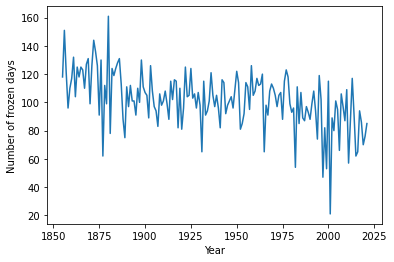

In [ ]:
hw5.vis_data("hw5.csv")

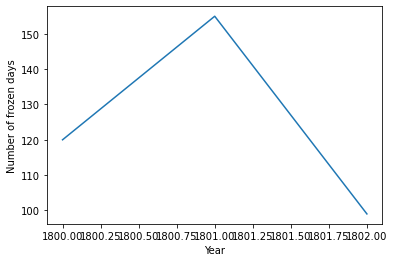

In [ ]:
hw5.vis_data("toy.csv")

In [ ]:
def lin_reg(file):
    #Q3a: X
    df = pd.read_csv(file)
    df = pd.DataFrame(df)
    X = np.array((np.ones(len(df)), df['year']), dtype=np.int64).T

    print("Q3a:")
    print(X)

    #Q3b: Y
    Y = np.array(df["days"], dtype=np.int64)

    print("Q3b:")
    print(Y)

    #Q3c: matrix product
    Z = np.dot(X.T,X)

    print("Q3c:")
    print(Z)

    #Q3d: inverse
    I = np.linalg.inv(Z)

    print("Q3d:")
    print(I)

    #q3e: pseudo_inverse
    PI = np.dot(I,X.T)

    print("Q3e:")
    print(PI)

    #q3f: B^
    hat_beta = np.dot(PI,Y)

    print("Q3f:")
    print(hat_beta)

    #Q4
    x_test = 2022
    y_test = hat_beta[0] + hat_beta[1]*x_test

    print("Q4: " + str(y_test))

    #Q5:
    if hat_beta[1] > 0:
        print("Q5a: " + str(">"))
        print("Q5b: " + str("this means that the the number of frozen days on lake mendota is annually increasing on average according to the data"))
    elif hat_beta[1] < 0:
        print("Q5a: " + str("<"))
        print("Q5b: " + str("this means that the the number of frozen days on lake mendota is annually decreasing on average according to the data"))
    else:
        print("Q5a: " + str("="))
        print("Q5b: " + str("this means that the the number of frozen days on lake mendota is annually constant on average according to the data"))

    #Q6
    x_star = (0 - hat_beta[0]) / hat_beta[1]

    print("Q6a: " + str(x_star))
    print("Q6b: " + str("I do not think this x_star is a compelling prediction of the data because even though the data is decreasing over time, it does not appear that there would be a year with zero frozen days for a very long time, so based on these trends of the data, I do not think it is a compelling prediction."))

In [4]:
lin_reg("toy.csv")

NameError: name 'lin_reg' is not defined